# Importing Libraries

In [ ]:
import os
import pandas as pd
import librosa.display
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing the dataset

In [ ]:
#Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Ravdess Dataset
paths=[]
labels=[]
for dirname,_,filenames in os.walk('/content/drive/MyDrive/SER_Dataset/SER_dataset/Ravdess/audio_speech_actors_01-24'):
  for filename in filenames:
    if(filename.split('-')[2]=='02'):
      continue
    paths.append(os.path.join(dirname,filename))
    label = filename.split('-')[2]
    if(label=='01'):
      label='neutral'
    elif(label=='02'):
      continue
    elif(label=='03'):
      label='happy'
    elif(label=='04'):
      label='sad'
    elif(label=='05'):
      label='angry'
    elif(label=='06'):
      label='fear'
    elif(label=='07'):
      label='disgust'
    elif(label=='08'):
      label='ps'
    labels.append(label.lower())
print('Ravdess Dataset is Loaded')

Ravdess Dataset is Loaded


In [ ]:
#Loading Tess Dataset
for dirname,_,filenames in os.walk('/content/drive/MyDrive/SER_Dataset/SER_dataset/Tess'):
  for filename in filenames:
    if(filename.split('_')[-1]=='ps.wav'):
      continue
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print('Tess Dataset is Loaded')

Tess Dataset is Loaded


In [ ]:
#Loading Savee Dataset
for dirname,_,filenames in os.walk('/content/drive/MyDrive/SER_Dataset/SER_dataset/Savee'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[1]

    if(label[0]=='n'):
      label='neutral'
    elif(label[0]=='h'):
      label='happy'
    elif(label[1]=='a'):
      label='sad'
    elif(label[0]=='a'):
      label='angry'
    elif(label[0]=='f'):
      label='fear'
    elif(label[0]=='d'):
      label='disgust'
    elif(label[1]=='u'):
      label='ps'
    labels.append(label.lower())
print('Savee Dataset is Loaded')

Savee Dataset is Loaded


In [ ]:
#Loading Crema Dataset
for dirname,_,filenames in os.walk('/content/drive/MyDrive/SER_Dataset/SER_dataset/Crema'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[2]

    if(label=='NEU'):
      label='neutral'
    elif(label=='HAP'):
      label='happy'
    elif(label=='SAD'):
      label='sad'
    elif(label=='ANG'):
      label='angry'
    elif(label=='FEA'):
      label='fear'
    elif(label=='DIS'):
      label='disgust'
    labels.append(label.lower())
print('Crema Dataset is Loaded')

Crema Dataset is Loaded


In [ ]:
#Creating the DataFrame
df = pd.DataFrame()
df['speech']=paths
df['label']=labels

In [ ]:
df['label'].value_counts()

disgust    1936
sad        1935
happy      1934
angry      1933
fear       1931
neutral    1713
ps          253
Name: label, dtype: int64

In [ ]:
#Creating functions for plotting waveplot and Spectogram
def waveplot(data,sr,emotion):
  plt.figure(figsize=(14,3))
  plt.title(title,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()
def spectogram(data,sr,emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(15,3))
  plt.title(title,size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()


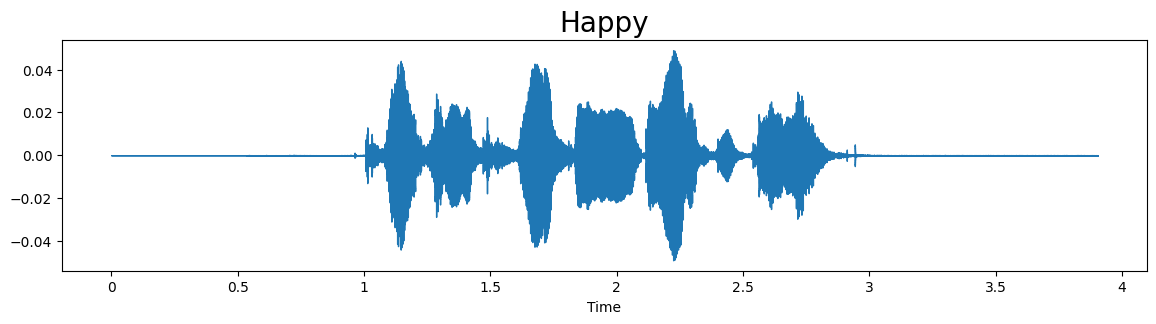

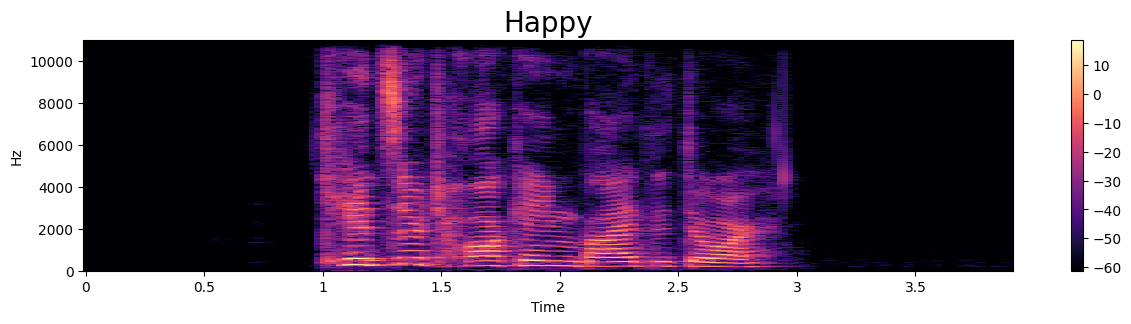

In [ ]:
#Example of plotting graphs for a fear
emotion = 'happy'
title='Happy'
path=np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

#Data Augmentation

In [ ]:
def noise(data):
  noise_amp = 0.035*np.random.uniform()*np.amax(data)
  data = data+noise_amp*np.random.normal(size=data.shape[0])
  return data

def stretch(data):
  return librosa.effects.time_stretch(data,rate=0.8)

def shift(data):
  shift_range = int(np.random.uniform(low=-5,high=5)*1000)
  return np.roll(data,shift_range)

def pitch(data,sampling_rate):
  return librosa.effects.pitch_shift(data,sr=sampling_rate,n_steps=0.7)

# Showing Data Aurgumentation for one sample
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[1]
data, sr = librosa.load(path)

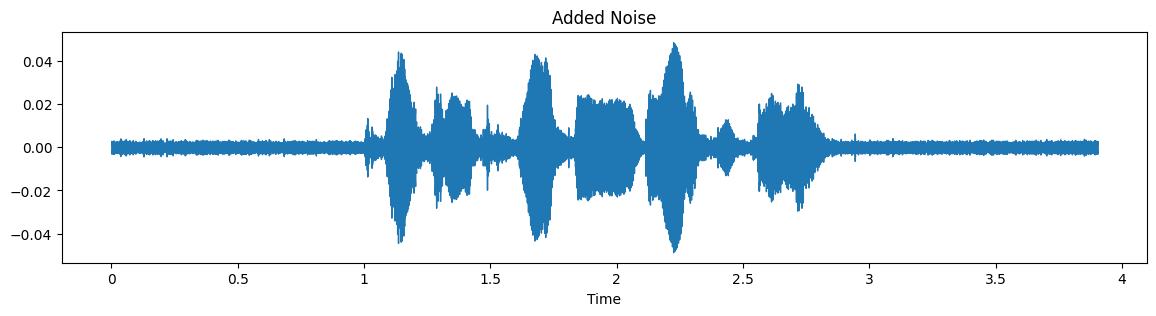

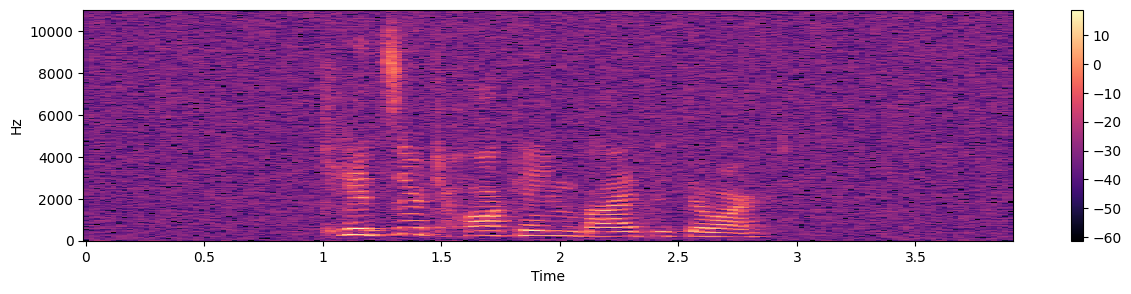

In [ ]:
# Noise Injeection
x=noise(data)
plt.figure(figsize=(14,3))
plt.title('Added Noise')
title=''
librosa.display.waveshow(y=x,sr=sr)
spectogram(x,sr,emotion)
Audio(x,rate=sampling_rate)

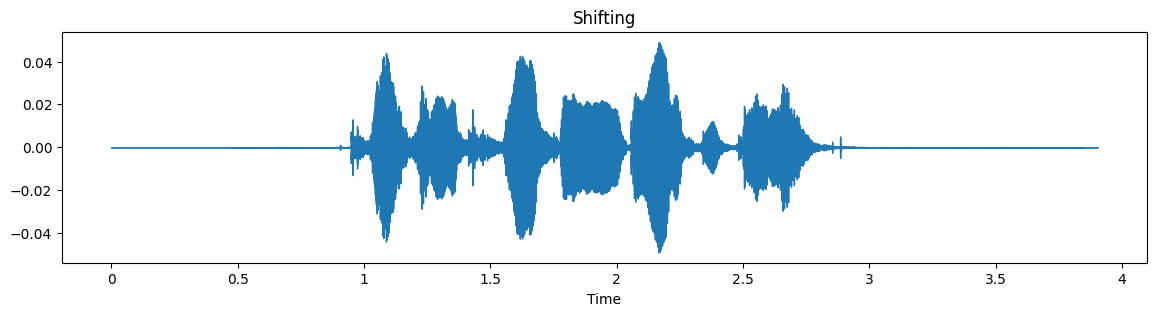

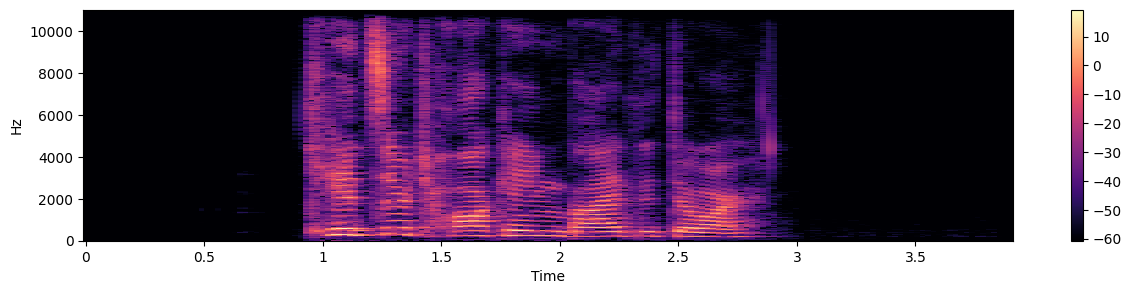

In [ ]:
# Shifting
x = shift(data)
plt.figure(figsize=(14,3))
plt.title('Shifting')
title=''
librosa.display.waveshow(y=x, sr=sr)
spectogram(x,sr,emotion)
Audio(x, rate=sampling_rate)

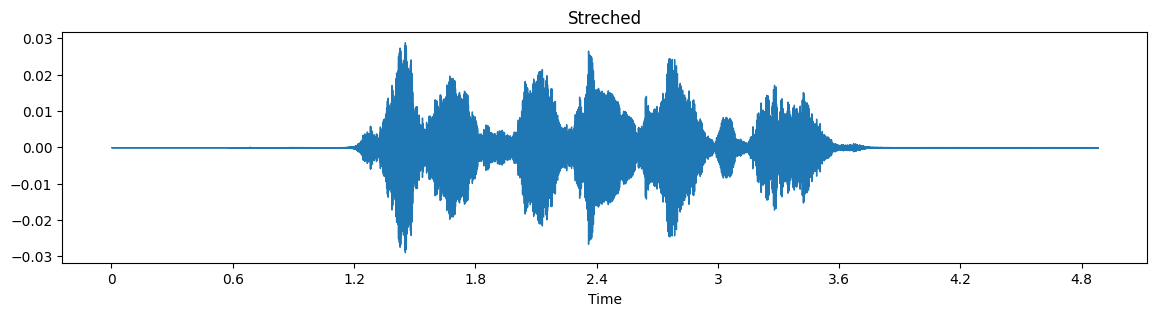

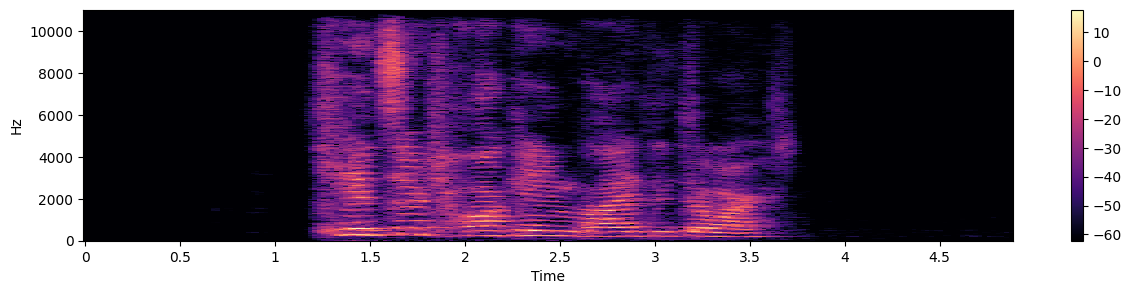

In [ ]:
# Streching
x = stretch(data)
plt.figure(figsize=(14,3))
plt.title('Streched')
title=''
librosa.display.waveshow(y=x,sr=sr)
spectogram(x,sr,emotion)
Audio(x,rate=sampling_rate)

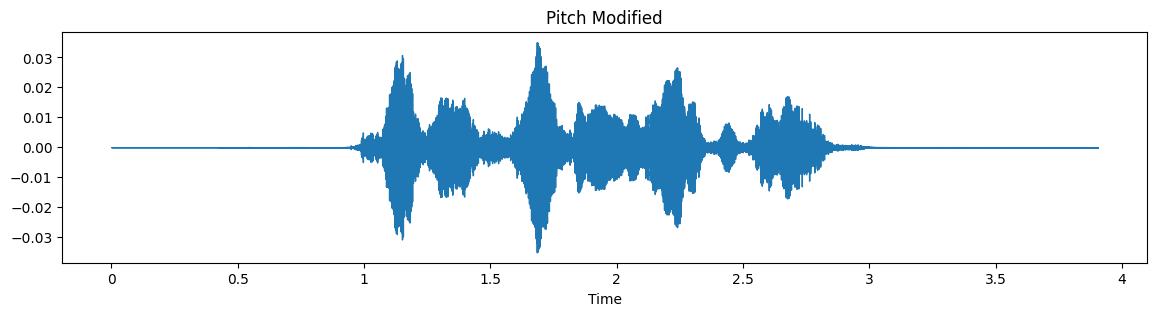

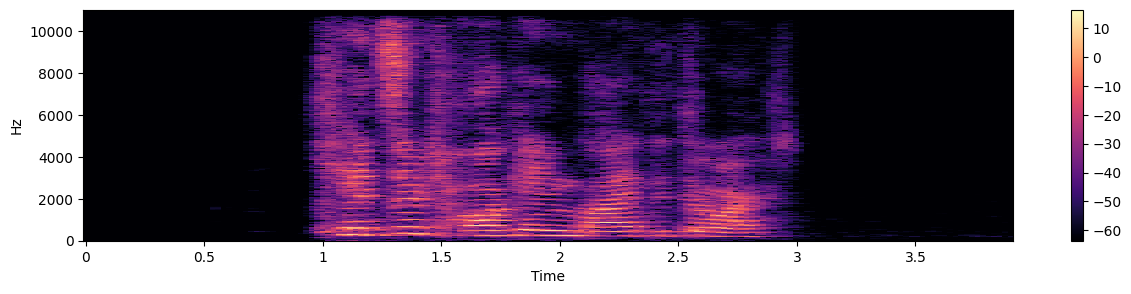

In [ ]:
# Pitch
x = pitch(data,sr)
plt.figure(figsize=(14,3))
plt.title('Pitch Modified')
title=''
librosa.display.waveshow(y=x, sr=sr)
spectogram(x,sr,emotion)
Audio(x, rate=sampling_rate)

#Feature Extraction

In [ ]:
def extract_features(y):
  result=np.array([])
  #mfcc
  Mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  result=np.hstack((result,Mfcc))
  #chroma
  stft=np.abs(librosa.stft(y))
  Chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sr).T,axis=0)
  result = np.hstack((result,Chroma))
  #mel
  Mel=np.mean(librosa.feature.melspectrogram(y=y,sr=sr).T,axis=0)
  result=np.hstack((result,Mel))
  #zcr
  Zcr =np.mean(librosa.feature.zero_crossing_rate(y=y).T,axis=0)
  result=np.hstack((result,Zcr))
  #rms
  Rms = np.mean(librosa.feature.rms(y=y).T,axis=0)
  result=np.hstack((result,Rms))
  return result

In [ ]:
def get_features(filename):
  y,sr = librosa.load(filename,duration=3,offset=0.5)
  # Without augmentation
  res1= extract_features(y)
  result = np.array(res1)

  # Data with noise
  noise_data = noise(y)
  res2=extract_features(noise_data)
  result = np.vstack((result,res2))

  # Data with Streching and Pitching
  data = stretch(y)
  ddata = pitch(data,sr)
  res3 = extract_features(ddata)
  result = np.vstack((result,res3))

  return result

In [ ]:
get_features(df['speech'][0])

array([[-6.56365845e+02,  5.33853607e+01, -9.12110519e+00,
         1.05633342e+00, -9.85986519e+00, -9.44822979e+00,
        -1.40470610e+01, -1.54553871e+01, -1.04799995e+01,
        -8.20174026e+00, -1.05536137e+01, -3.94806290e+00,
        -7.55606508e+00, -6.50345755e+00, -3.50893879e+00,
        -7.73866892e+00, -5.36868191e+00, -5.79308987e+00,
        -7.53292513e+00, -5.40056467e+00, -6.16821909e+00,
        -5.24304724e+00, -4.80135107e+00, -3.22227788e+00,
        -2.86873007e+00,  4.97119188e-01,  6.57582700e-01,
         2.61321902e+00,  2.10879564e+00,  5.13847971e+00,
         5.22174454e+00,  8.23751450e+00,  8.43279743e+00,
         7.49837208e+00,  5.05258989e+00,  2.66102099e+00,
         4.62617248e-01,  1.20444584e+00, -4.16647971e-01,
        -2.43451633e-02,  6.17651999e-01,  5.74763894e-01,
         5.50299406e-01,  5.61379075e-01,  5.23146689e-01,
         4.61876482e-01,  4.89006996e-01,  5.63954055e-01,
         6.32764459e-01,  6.74031734e-01,  6.59276605e-0

In [ ]:
X,Y =[],[]
for i in range(len(paths)):
  feature = get_features(df['speech'][i])
  for ele in feature:
    X.append(ele)
    Y.append(df['label'][i])

In [ ]:
# Getting the data into csv
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)